In [95]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

sns.set_style('whitegrid')

In [96]:
iris_train = pd.read_csv('data/irises/train_iris.csv', index_col=0)
iris_test = pd.read_csv('data/irises/test_iris.csv', index_col=0)
iris = pd.concat([iris_train, iris_test])

In [97]:
iris.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [98]:
train_X = iris_train.drop('species', axis=1)
train_y = iris_train[['species']]

In [99]:
test_X = iris_test.drop('species', axis=1)
test_y = iris_test[['species']]

In [106]:
scores = pd.DataFrame()
rs = np.random.seed(0) 

for max_depth in range(1, 101):
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=rs)
    clf.fit(train_X, train_y)
    
    train_score = clf.score(train_X, train_y)
    test_score = clf.score(test_X, test_y)
    cross_train_score = cross_val_score(clf, train_X, train_y, cv=5).mean()
    cross_test_score = cross_val_score(clf, test_X, test_y, cv=5).mean()
    accuracy = accuracy_score(test_y, clf.predict(test_X))

    temp_score_df = pd.DataFrame(data={
        'depth': [max_depth],
        'train_score': [train_score],
        'test_score': [test_score],
        'cross_train_score': [cross_train_score],
        'cross_test_score': [cross_test_score],
        'accuracy': [accuracy]
    })
    
    scores = scores.append(temp_score_df)
    
    

In [107]:
scores.head()

,depth,train_score,test_score,cross_train_score,cross_test_score,accuracy
0,1,0.70,0.60,0.70,0.70,0.60
0,2,0.97,0.94,0.95,0.92,0.94
0,3,0.99,0.94,0.96,0.92,0.94
0,4,1.00,0.92,0.96,0.94,0.92
0,5,1.00,0.92,0.96,0.94,0.92


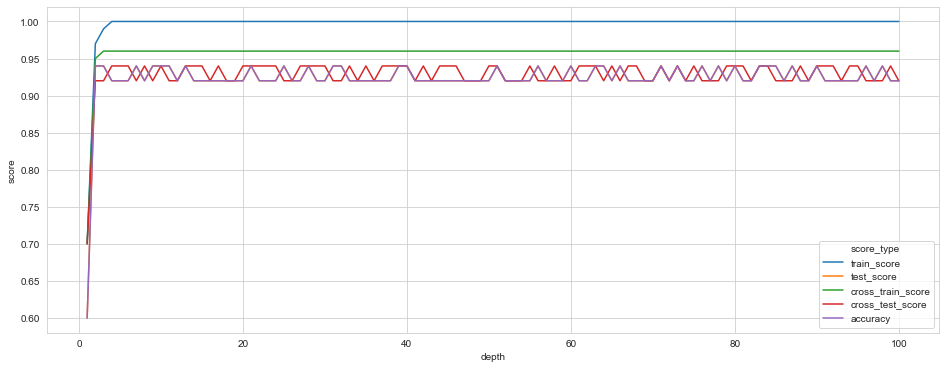

In [108]:
melt_score = pd.melt(frame=scores, id_vars='depth', 
                     value_vars=['train_score', 'test_score', 'cross_train_score', 'cross_test_score', 'accuracy'], 
                     value_name='score', var_name='score_type')

plt.figure(figsize=(16, 6))
sns.lineplot(x='depth', y='score', hue='score_type', data=melt_score)


In [103]:
melt_score.head()

,depth,score_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00
